## What's spaCy?

SpaCy is free, open-source library for advanced Natural language processing(NLP) in python.

Suppose you're working with a lot of text, you'll eventually want to know more about it. For example, what's it about? What does the wprds means in the context? Who is doing what to whom> What product and companies are mentioned in the text? Which texts are simmilar to each other.

SpaCy is designed specially for production use and helps you build applications that process and "understand" large volume of text. It can  be used to build information extraction or natural language processing systems, or to pre-processing text for deep learning.

### What spaCy isn't?

- First, spaCy isn't platform or an "API". Unlike a platform,spaCy doesn't provide a software as a service or a web application. It's an open-source library designed to help you build NLP application, not a consumable service.
- Second, spaCy is not an out-of-the-box chat box engine. While spaCy can be used to power conversational application, it's not designed specifically for chat boxs, and only provide the underlying text processing capabilities.
- Third, spaCy is not reaserch software. It's build on the latest reaserch, but it's designed to get things done. This leads to fairly different design decisions than NLTK or CoreNLP, which were created as platforms for teaching and reaserch. The main difference is that spaCy is intregated and opinionated. spaCy tries to avoid asking the user to choose between multiple algorithms that deliver equivalent functionality. Keeping the menu small lets spaCy deliver generally better performance and developer experience.
- Forth, spaCy is not a company it's an open-source library. The company publishing spaCy and other software is called Explosion AI.

### Installation

In [2]:
!pip install spacy

Defaulting to user installation because normal site-packages is not writeable
  Using cached spacy-3.4.3-cp39-cp39-win_amd64.whl (11.9 MB)
  Using cached pathy-0.10.1-py3-none-any.whl (48 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached cymem-2.0.7-cp39-cp39-win_amd64.whl (30 kB)
  Using cached murmurhash-1.0.9-cp39-cp39-win_amd64.whl (18 kB)
  Using cached catalogue-2.0.8-py3-none-any.whl (17 kB)
  Using cached thinc-8.1.5-cp39-cp39-win_amd64.whl (1.3 MB)
  Using cached typer-0.7.0-py3-none-any.whl (38 kB)
  Using cached spacy_loggers-1.0.4-py3-none-any.whl (11 kB)
  Using cached preshed-3.0.8-cp39-cp39-win_amd64.whl (96 kB)
  Using cached wasabi-0.10.1-py3-none-any.whl (26 kB)
  Using cached srsly-2.4.5-cp39-cp39-win_amd64.whl (481 kB)
  Using cached spacy_legacy-3.0.10-py2.py3-none-any.whl (21 kB)
  Using cached confection-0.0.3-py3-none-any.whl (32 kB)
     ---------------------------------------- 7.0/7.0 MB 818.1 kB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


### Features

Here, you'll come across mentions of spaCy's features and capabilities.

### Statistical models
Some of spaCy's features works independently, other requires statistical models to be loaded, which enable spaCy to predict linguistic annotations. For example, whether a word is verb or noun. spaCy currently offers statistical models for a variety of language. Which can be installed as individual Python modules. Models can differe in size, speed, memory usage and the data they include. The model you choose always depends upon your use cases and texts you're working with. For a general use case, the small and the default models are always a great start. The typically include the following componets:

- Binary weights:- for the part-of speech tagger, dependency parser and named entity recognizer into predict those annotations in context.
- Lexical entries:- in the vocabulary, i.e. words and their context-independent attributes like the shape or spelling.
- Data files:- Like lemmatization relues and lookup tables.
- Word vectors:- i.e. multi-dimensional meaning representations of words that let you determine hoe simmilar they are to each other.
- Configuration:- option like the language and processing pipeline settings, to put spaCy in the correct state when you load in the model.

### Linguistic Annotations

spaCy provides a variety of linguistic annotations to give you insights into text's grammatical structure. This includes the word types, like the parts of speech, and how the words are related to each other. For example, if you're analysing text, it makes a huge difference whether a noun is the subject of sentence. or the object- or whether 'google' is used as a verb, or refers to the website or company in a specific context.

In [4]:
!python -m spacy download en_core_web_sm 

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 12.8/12.8 MB 3.9 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [5]:
# https://spacy.io/usage/linguistic-features
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. starup for $1 billion")
for token in doc:
    print(token.text, token.pos_, token.dep_)
    
# Text: The original word text.
# Lemma: The base form of the word.
# POS: The simple part-of-speech tag.
# Dep: Syntactic dependency, i.e. the relation between tokens.
# Shape: The word shape - capitalization, punctuation, digits.
# is alph: Is the token an alpha character?
# is alpha: Is the token part of a stop list, i.e. the most common words of the language?

Apple PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.K. PROPN compound
starup NOUN dobj
for ADP prep
$ SYM quantmod
1 NUM compound
billion NUM pobj


Even though a Doc is processed -e.g. split into individual words and annotated - it still hols all information of the original text, like a whitespace characters. You can always get the offset of a token into the original string, or recontruct the original by joining the tokens and their trailing whitepace. This way, you'll never lose any inforamtion when processing text with spaCy.

## Tokenization

During processing, spaCy first tokenizes the text, i.e. segments it into words, punctuation and so on. This is done by applying rules specific to each language. For example, punctuation at the end of a sentence should be split off- whereas "U.K." should remain one token. Each doc consists of individual tokens and we can iterate over them:

In [6]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for token in doc:
    print(token.text)

Apple
is
looking
at
buying
U.K.
startup
for
$
1
billion


## Part-of-speech(POS) tags and dependencies

After tokenization, spaCy can parse and tag a given doc. This is where the statistical model comes in, which enables spaCy to make a prediction of which tag or label most likely applies in this context. A model consists of binary data and is produced by showing a  system enough examples for it to make prediction that generalize across the language - for example, a word following "the" in English is most likely a noun.

Linguistic annotations are available as Token like many NLP libraries. spaCy encodes all strings to hash values to reduce memory usage and improve efficiency. So to get the readable string representation of an attribute, we need to add an underscore _to its name:

In [7]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Coronavirus: Delhi resident tests positive for coronavirus, total 31 people infected in India")

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
         token.shape_, token.is_alpha, token.is_stop)

Coronavirus Coronavirus PROPN NNP nsubj Xxxxx True False
: : PUNCT : punct : False False
Delhi Delhi PROPN NNP compound Xxxxx True False
resident resident NOUN NN nsubj xxxx True False
tests test VERB VBZ appos xxxx True False
positive positive ADJ JJ amod xxxx True False
for for ADP IN prep xxx True True
coronavirus coronavirus NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
total total ADJ JJ ROOT xxxx True False
31 31 NUM CD nummod dd False False
people people NOUN NNS dobj xxxx True False
infected infect VERB VBN acl xxxx True False
in in ADP IN prep xx True True
India India PROPN NNP pobj Xxxxx True False


Using spaCy buit-in displaCy visualizer, here's what our example sentence and its  dependencies look like:

In [8]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Google, Apple crack down on fake coronavirus apps")
displacy.serve(doc, style="dep")

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\spacy\displacy\__init__.py:103: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


## Named Entities

A named entity is a "real-world object" that's assigned a name -for example, a person, a country, a product or a book title. spaCy can recognize various types of named entities in a document, by asking the model for a prediction. Because models are statistical and strongly depend on the examples they were trained on, this doesn't always work perfectly and might need some tuning later, depending on your use case.

Named entities are available as the ents property of Doc:

In [9]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Coronavirus: Delhi resident tests positive for coronavirus, total 31 people infected in India")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Delhi 13 18 GPE
31 66 68 CARDINAL
India 88 93 GPE


## Visualizing the Named Entity recognizer

The entity visualizer, ent, highlight named entities and their lable in the text.

In [10]:
import spacy
from spacy import displacy

text = "Coronavirus: Delhi resident tests positive for coronavirus, total 31 people infected in India"
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
displacy.serve(doc, style="ent")


Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


## Words vector and similarity

Similarity is determined by comparing word vectors or "word embeddings", multi-dimensional meaning representations of a word.Word vectors can be generated using an algorithms like word2vec and usually look like this:

Important_note:- To make them compact and fast, spaCy's small models(all the packages end with sm) don't ship with the word vectors and only include context-sensitive tensors. This means you can still use the similarity() to comapre documents, token and spans- but result wont't be as good, and individual tokens wont's have any vectors is assigned. So in order to use real word vectors, you need to download a larger model.

    !python -m spacy download en_core_web_md
  
 Models that come with built-in word vectors make them available as the Token.vector attribute. Doc.vector and Span.vector will default to an average of their token vectors. You can also check if a token has a vector assigned and get the L2 norm, which can be used normalize vectors.

In [12]:
!python -m spacy download en_core_web_md

Defaulting to user installation because normal site-packages is not writeable
     --------                                 8.8/42.8 MB 4.1 MB/s eta 0:00:09


ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 435, in _error_catcher
    yield
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 516, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "C:\ProgramData\Anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\ProgramData\Anaconda3\lib\ssl.py", line 1242, in recv_into
    return self.read(nbytes, buffer)
  File "C:\ProgramData\Anaconda3\lib\ssl.py", line 1100, in read
    return self._sslobj.read(len, buffer)
soc

In [13]:
import spacy.cli
spacy.cli.download("en_core_web_md")
import en_core_web_md
nlp = en_core_web_md.load()

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [14]:
import spacy

nlp = spacy.load("en_core_web_md")
tokens = nlp("lion bear apple banana fadsfdshds")

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)
    
# Vector norm: The L2 norm of the toke's vector (the square root of the sun of the values squared)
# has_vectors: Does the token have a vector representation?
# OOV: Out-of-vocabulary

lion True 55.145737 False
bear True 52.114674 False
apple True 43.366478 False
banana True 31.620354 False
fadsfdshds False 0.0 True


spacy is able to comapre two objects and make a prediction of how similar they are. Predicting similarity is useful for building  recommendation system or flagging duplicates. For example, you can suggest a user content that's similar to what they're currently looking at, or label a support ticket as duplicate if it's very similar to an already existing one.

Each Doc, Span and Token comes with similarity() method that lets you compare it with another object, and determine the similarity. Of course similarity is always subjective - whether "dog" and "cat" are similar really depends on how you're looking at it. spaCy similarity models usually assumes a pretty general purpose definition of similarity.

In [15]:
import spacy

nlp = spacy.load("en_core_web_md") # make sure to use larger model!
tokens = nlp("lion bear apple mango spinach")

for tokenll in tokens:
    for token13 in tokens:
        print(tokenll.text, token13.text, tokenll.similarity(token13))

lion lion 1.0
lion bear 0.40031397342681885
lion apple 0.06742795556783676
lion mango 0.18510109186172485
lion spinach 0.06951922178268433
bear lion 0.40031397342681885
bear bear 1.0
bear apple 0.18584339320659637
bear mango 0.14443381130695343
bear spinach 0.0758492723107338
apple lion 0.06742795556783676
apple bear 0.18584339320659637
apple apple 1.0
apple mango 0.6305075883865356
apple spinach 0.5129707455635071
mango lion 0.18510109186172485
mango bear 0.14443381130695343
mango apple 0.6305075883865356
mango mango 1.0
mango spinach 0.5483009815216064
spinach lion 0.06951922178268433
spinach bear 0.0758492723107338
spinach apple 0.5129707455635071
spinach mango 0.5483009815216064
spinach spinach 1.0


## Pipelines

When you call nlp on a text, spaCy first tokenizes the text to produce a Doc object. The Doc is then processed in several different steps- this is also reffred to as the processing pipeline. The pipeline used by default models consists of a tagger, a parse and an entity  recognizer. Each pipeline component returns the processed Doc, which is then passed on to the next component.



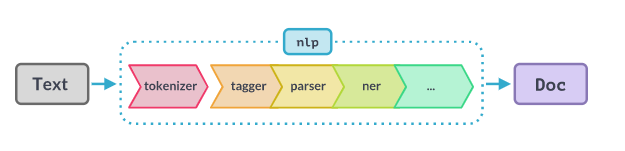

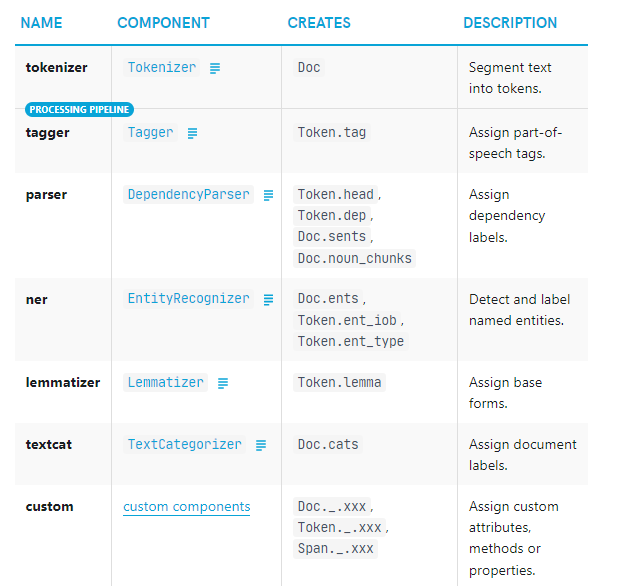

The processing pipeline always depends on the statistical model and its capabilities. For example, a pipeline can only include an entity recognizer component it the model includes data to make predictions of entity labels. This is why each model will specify the pipeline to use in its meta data, as a simple list containing the component names.

    "pipeline": ["tagger", "parser", "ner"]